## LGMVIP - DS Intermediate level task #2: Prediction using Decision Tree  Algorithm 
### Author: Zakaria Jnayni
![04](04.png)
### Load Libraries 

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Load the dataset

In [2]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data visualization

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

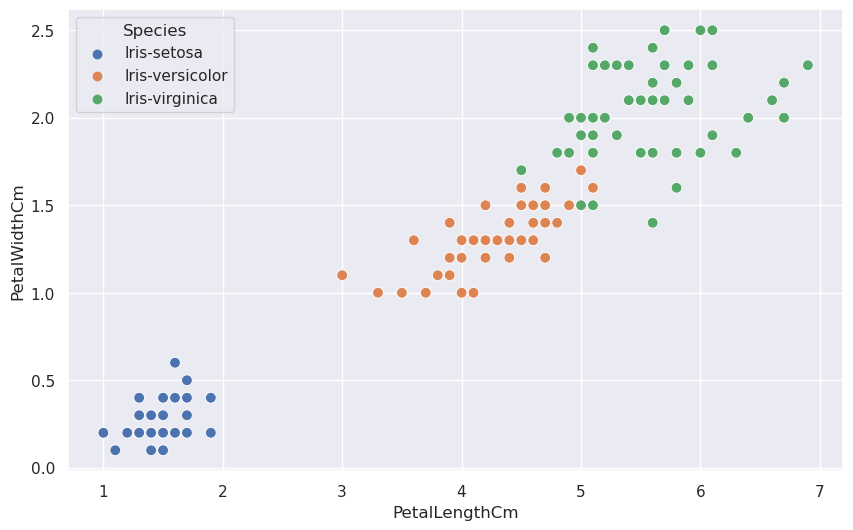

In [3]:
plt.figure(figsize = (10, 6))
sns.set_theme()

sns.scatterplot(data=iris, x="PetalLengthCm", y="PetalWidthCm", s=60, hue='Species')

### Train Test split 
We'll split the data to features and target variable

In [4]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = iris[features] 
y = iris.Species 

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

### Decision Tree model

In [10]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [11]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


### Model validation & confusion matrix

In [15]:
score = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
print(f'Test Accuracy DT: {score}')
print('Classification Report DT:')
print(clf_report)

Test Accuracy DT: 0.9555555555555556
Classification Report DT:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



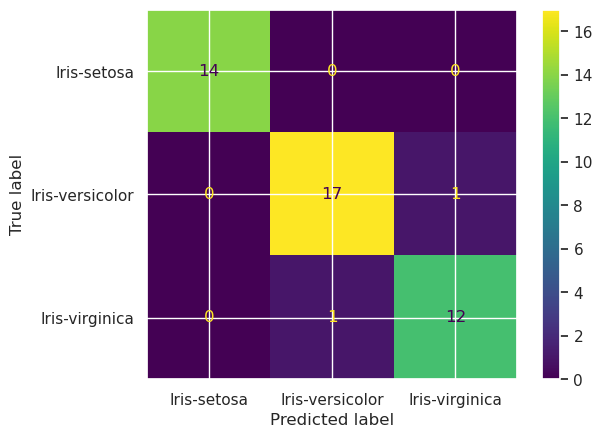

In [18]:
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

### DT Visualization

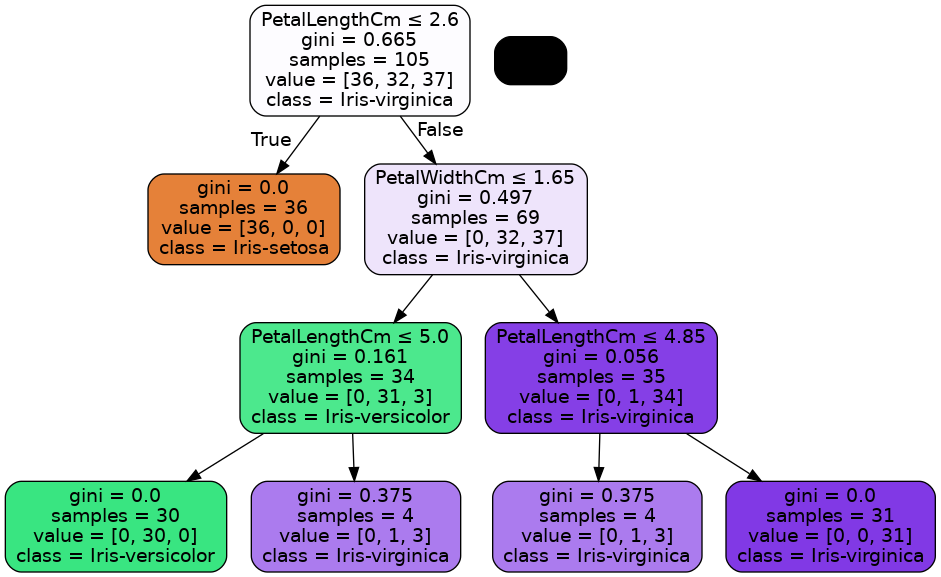

In [12]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = features,
                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Iris.png')
Image(graph.create_png())